<a href="https://colab.research.google.com/github/Jasmine-kaur8/Consumer_Retention_Project/blob/main/Customer_Retention_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CUSTOMER RETENTION PROJECT

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_retention_dataset.xlsx to customer_retention_dataset.xlsx


Importing the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from string import digits

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Importing required libraries

In [ ]:
df = pd.read_excel('customer_retention_dataset.xlsx')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

Reading the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer retention(encoded).xlsx to customer retention(encoded).xlsx


Importing the encoded data

In [ ]:
data = pd.read_excel('customer retention(encoded).xlsx')
data.head()


,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you

Reading the encoded dataset

In [ ]:
#Removing tab spaces
df.columns = df.columns.str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
df.columns = df.columns.str.strip()

Removing unnecessary strings and integers present in the dataset

In [ ]:
#Removing tab spaces
data.columns = data.columns.str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
data.columns = data.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
data.columns = data.columns.str.strip()

Removing unnecessary strings and integers present in the encoded dataset

In [ ]:
df.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (P

Reading the data after making the changes

In [ ]:
df.shape

(269, 71)

The dataset has 269 rows and 71 columns

In [ ]:
data.shape

(269, 71)

The encoded dataset also has 269 rows and 71 columns

In [ ]:
df.isna().sum().any()

False

There is no null value in the dataset

In [ ]:
data.isna().sum().any()

False

Also, there is no null value in the encoded dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   Gender of respondent                                                                                     269 non-null    int64 
 1   How old are you?                                                                                         269 non-null    int64 
 2   Which city do you shop online from?                                                                      269 non-null    object
 3   What is the Pin Code of where you shop online from?                                                      269 non-null    int64 
 4   Since How Long You are Shopping Online ?                                                    

Some of the data are of object datatype while others are numerical. All the values are non-null.

In [ ]:
data.describe()

,Gender of respondent,How old are you?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,220465.747212,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,1.275093,1.360595,2.546468,3.921933,1.784387,2.884758,2.684015,4.382900,4.137546,3.873606,4.107807,4.286245,4.115242,4.394052,4.368030,4.256506,4.464684,4.591078,4.375465,3.921933,3.565056,4.330855,4.587361,3.955390,4.286245,4.591078,4.379182,4.182156,4.148699,4.349442,4.263941,3.914498,3.553903,3.223048,3.501859,3.282528,4.163569
std,0.471398,1.066012,140524.341051,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,0.645429,0.897805,1.264718,1.196014,1.084997,1.028380,1.344060,1.046603,0.918123,1.068027,1.082206,1.059708,1.064045,1.162586,0.951364,0.976021,1.080551,0.660785,0.916430,1.157971,1.304572,0.858569,0.831284,1.122139,0.789292,0.649393,0.883775,1.072162,0.842110,0.755953,1.000485,0.693879,1.065869,1.219581

Most of the features have range between 1 to 5

In [ ]:
#Let's check unique values in each column to exolre dataset more deeply
print("Column-wise Unique values are as:-")
for column in df.columns.values:
    print("\n Unique values in ",column," column is " ,df[column].nunique())

Column-wise Unique values are as:-

 Unique values in  Gender of respondent  column is  2

 Unique values in  How old are you?  column is  5

 Unique values in  Which city do you shop online from?  column is  11

 Unique values in  What is the Pin Code of where you shop online from?  column is  39

 Unique values in  Since How Long You are Shopping Online ?  column is  5

 Unique values in  How many times you have made an online purchase in the past  year?  column is  6

 Unique values in  How do you access the internet while shopping on-line?  column is  4

 Unique values in  Which device do you use to access the online shopping?  column is  4

 Unique values in  What is the screen size of your mobile device?  column is  4

 Unique values in  What is the operating system (OS) of your device?  column is  3

 Unique values in  What browser do you run on your device to access the website?  column is  4

 Unique values in  Which channel did you follow to arrive at your favorite online sto

Each feature has different number of unique values

# EXPLORATORY DATA ANALYSIS (EDA)

#**ANALYSIS WITH THE PERSONAL INFORMATION DATA**

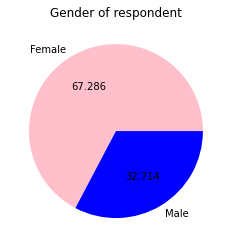

In [ ]:
y1 = df['Gender of respondent'].value_counts()
labels = ["Female","Male"]
plt.pie(y1, labels = labels, autopct = '%.3f', colors = ['pink','blue'])
plt.title('Gender of respondent')
plt.show()

In this survey, female respondents are twice in number as compared to the male respondents.

Text(0.5, 1.0, 'count plot for gender and the enjoyment derived')

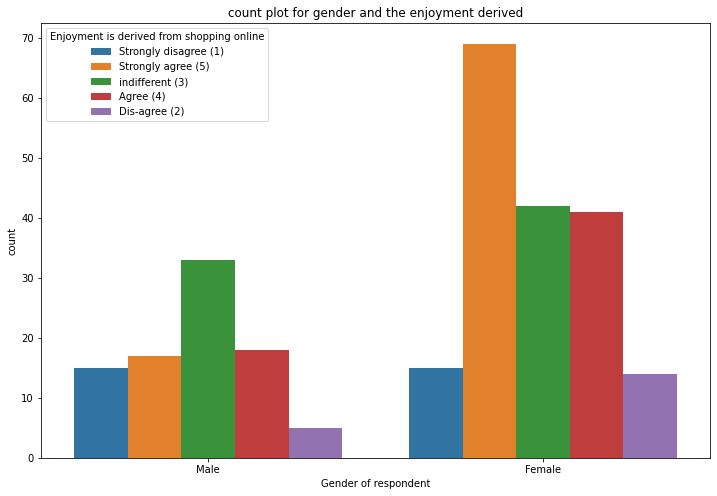

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(df['Gender of respondent'], hue = df['Enjoyment is derived from shopping online'], ax = ax)
plt.title('count plot for gender and the enjoyment derived')

On an average, females enjoy more while doing online shopping as compared to males.

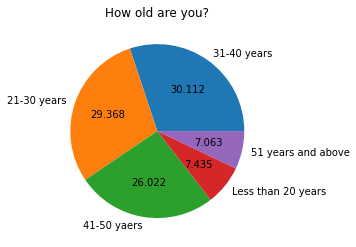

In [ ]:
y2 = df['How old are you?'].value_counts()
labels = ["31-40 years","21-30 years","41-50 yaers","Less than 20 years","51 years and above"]
plt.pie(y2, labels = labels, autopct = '%.3f')
plt.title('How old are you?')
plt.show()

Most of the respondents are in the age group (31-40) years. This is followed by the age group (21-30) years. After that, the third highest number of respondents are in the age group (41-50) years. This is then followed by teenagers and then the senior citizens.

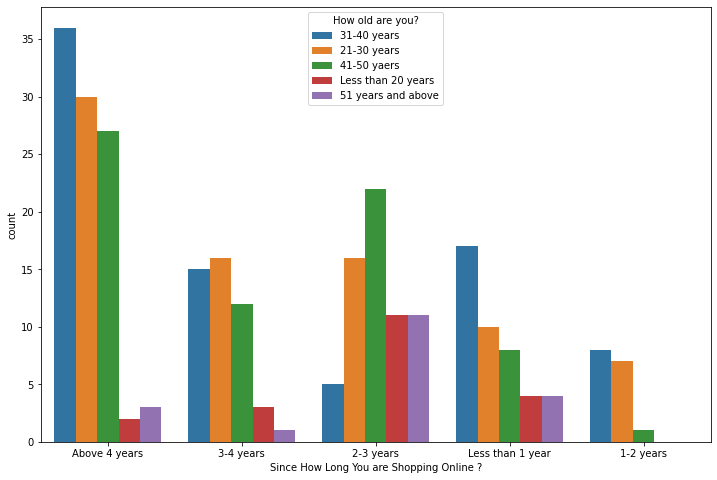

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue=df['How old are you?'])

Highest number of people who have been shopping online lies between the age group (20-50) years. Those who shop online for 3-4 years are approximately same in count for the age group 21-50 but very less for teenagers and senior citizens. The graph represents that the highest number of teenagers and senior citizen are shopping online from 2-3 years. There are no teenagers and senior citizens who are shopping online from 1-2 years in the survey data.


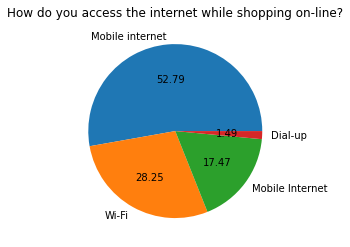

In [ ]:
y4 = df['How do you access the internet while shopping on-line?'].value_counts()
labels = ["Mobile internet","Wi-Fi","Mobile Internet","Dial-up"]
plt.pie(y4, labels = labels, autopct = '%.2f')
plt.title('How do you access the internet while shopping on-line?')
plt.show()

Mobile internet and Mobile Internet is considered as two different categories, we need to combine it as they are the same except for the capitalization difference. 

In [ ]:
df['How do you access the internet while shopping on-line?'].replace('Mobile internet','Mobile Internet', inplace=True)


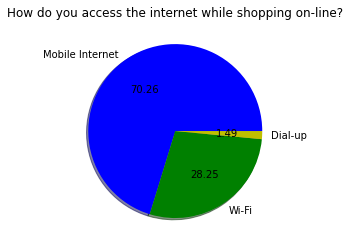

In [ ]:
y4 = df['How do you access the internet while shopping on-line?'].value_counts()
labels = ["Mobile Internet","Wi-Fi","Dial-up"]
plt.pie(y4, labels = labels, autopct = '%.2f', colors = ['b','g','y'], shadow = True)
plt.title('How do you access the internet while shopping on-line?')
plt.show()

*   Around **70%** of the respondents use **mobile interne**t for making an online purchase.
*    This is followed by **Wi-Fi** which constitutes **28.25%** of the total respondents. 
*   Only a negligible percent i.e. **1.48%** of people dial up to do online shopping

In [ ]:
data['How do you access the internet while shopping on-line?'].replace('Mobile internet','Mobile Internet', inplace=True)

In [ ]:
df['How many times you have made an online purchase in the past  year?'].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: How many times you have made an online purchase in the past  year?, dtype: int64

There is some ambiguity in the data, as there are two categories: one says 41 times and above and the second says 42 and above. So, we should combine them both to make it 41 times and above.

In [ ]:
#Changing 42 times and above to 41 times and above 
df['How many times you have made an online purchase in the past  year?'].replace('42 times and above','41 times and above', inplace=True)

data['How many times you have made an online purchase in the past  year?'].replace('42 times and above','41 times and above', inplace=True)

Text(0.5, 1.0, 'count plot for payment method and time before making a purchase')

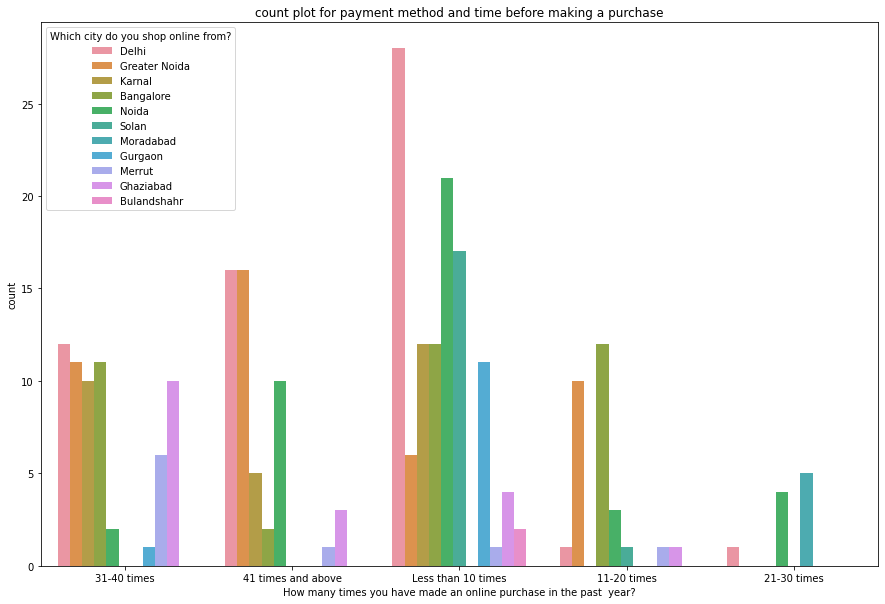

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(df['How many times you have made an online purchase in the past  year?'], hue = df['Which city do you shop online from?'], ax = ax)
plt.title('count plot for payment method and time before making a purchase')

*   Most of the people have puchased less than 10 times in the past year. 
*   Mostly, those who purchased between 11 to 20 times, stay in noida or greater noida.
*    Very few people purchased 21-30 times, those who purchase stay in Delhi, Noida or Gurgaon. 
*   Those who purchased 31-40 times are generally from Delhi, Greater Noida, Karnal, Bangalore, and Ghaziabad.
*    Most people who purchased more than 41 times are either from Delhi or Greater Noida. Also, some of them are from Bangalore or Karnal or Merrut or Bulandshahr.


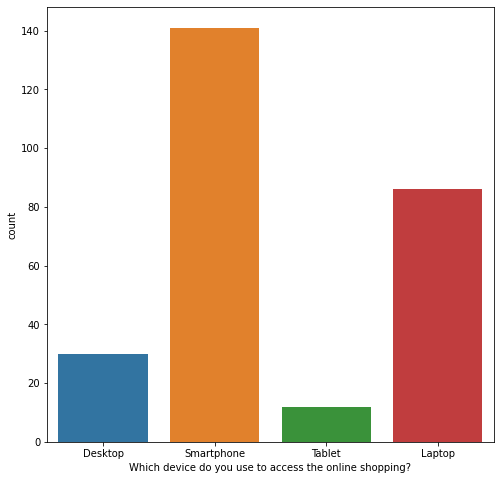

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(df['Which device do you use to access the online shopping?'], ax = ax)

The highest number of people use smartphone for doing online shopping. The second highest is laptop. Some people use Desktop to make online purchases. Vey few of them use tablet to do online shopping.

Text(0.5, 1.0, 'count plot for device used and reason of abondoning the bag')

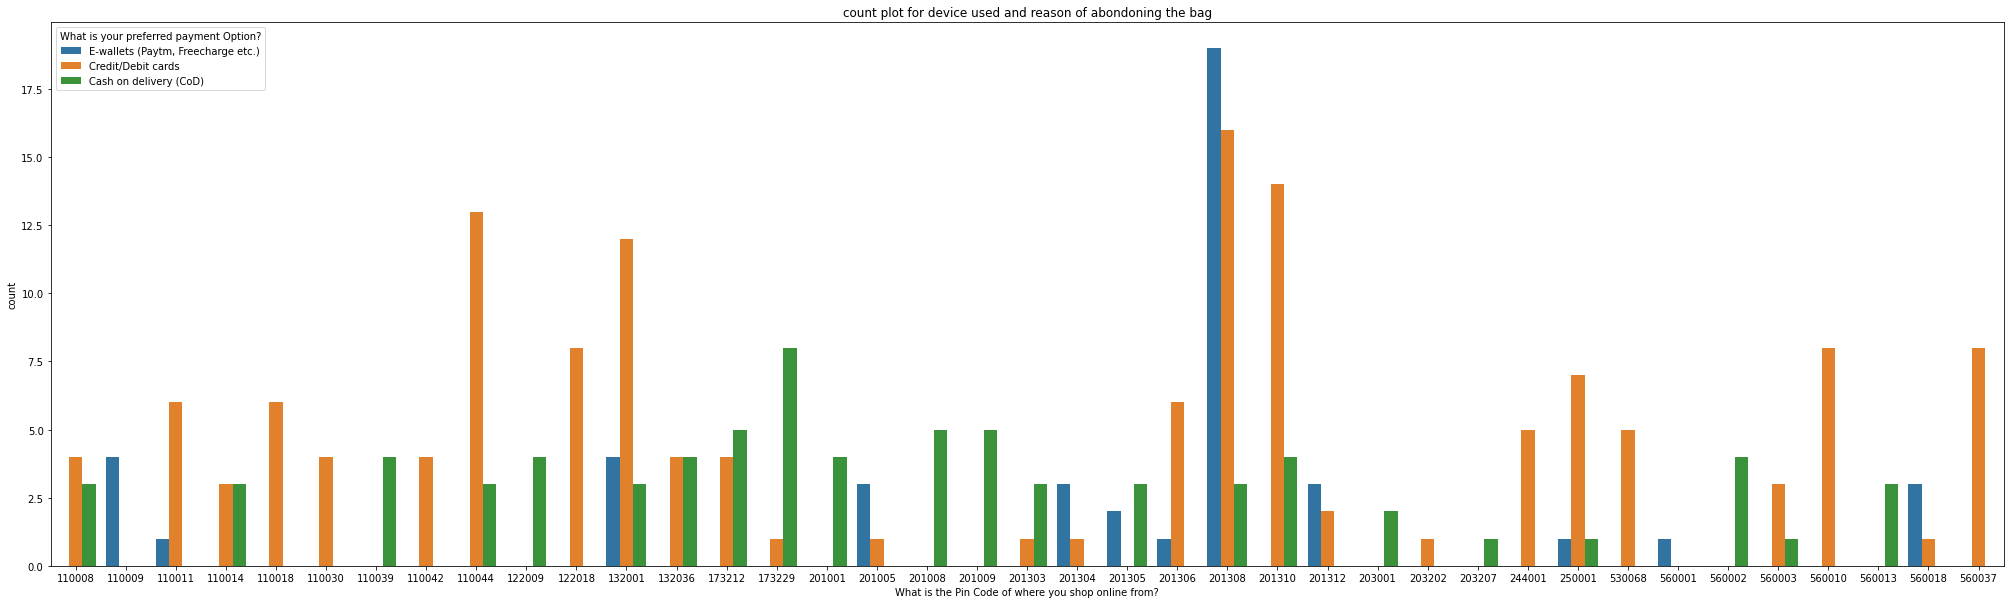

In [ ]:
fig, ax = plt.subplots(figsize=(35,10))
sns.countplot(df['What is the Pin Code of where you shop online from?'], hue = df['What is your preferred payment Option?'], ax = ax)
plt.title('count plot for device used and reason of abondoning the bag')


*  Comparitively less people use E-wallets and there are many pin codes that do not use E-wallets at all. The only pin code where the maximum number of people uses E-wallets is 201308.
*   Most of the people use Credit/Debit cards. The people who do not use Credit/Debit cards are from the pin code: 201008, 201009,201305, 203207, 560001, 560002,56013. The people in pin code 201308 and 201310 are those who use the Credit/Debit cards the most. 
*   There are few pin codes that do not use the cash on delivery payment option at all. While relatively less people prefer using COD in other pin codes.

#***ANALYSIS ABOUT THE REPEAT PURCHASE BEHAVIOUR OF THE CUSTOMER***

Text(0.5, 1.0, 'count plot for device used and reason of abondoning the bag')

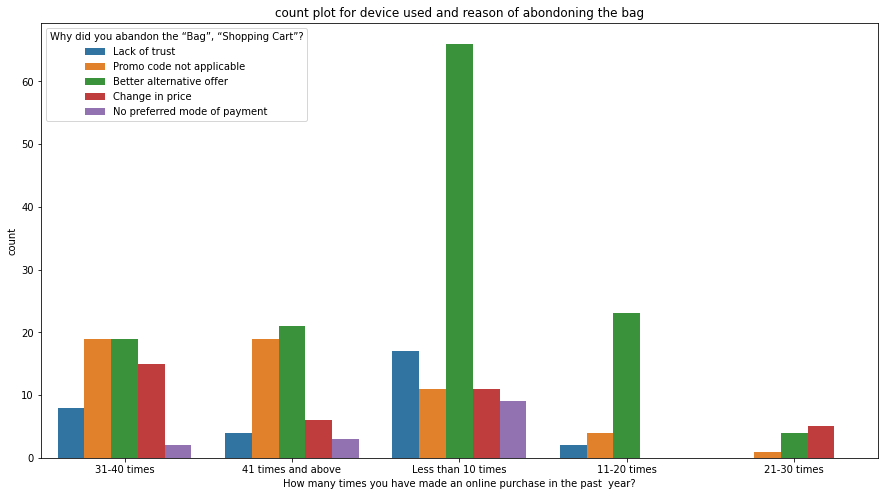

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df['How many times you have made an online purchase in the past  year?'], hue = df['Why did you abandon the “Bag”, “Shopping Cart”?'], ax = ax)
plt.title('count plot for device used and reason of abondoning the bag')




*   Those who purchased less than 10 times in the past year, mostly abondoned their bags because they were able to see some better alternative offer. In this category other resons for abondoning is quite less as compared to the better alternative offer.
*   Those who purchased 11-20 times, abondoned their bages because of the better alternative offer. Neglible percentage of people abondoned due to Lack of trust and promo code not applicable. There is no other reason fro abondoning bags who purchased 11-20 times.
*   Those who purchased 21-30 times, abondoned their bags the least. Still, those who did, the reasons include promo code not applicable, better alternative offer, change in price.
*   Those who purchase 31 times to 40 times and 41 times and above have almost the same distribution for the reasons of abondoning the bag. It is just those wh made 31-40 purchases, abondoned their bags more than those who made more than 41 purchases due to the lack of trust and change in price.



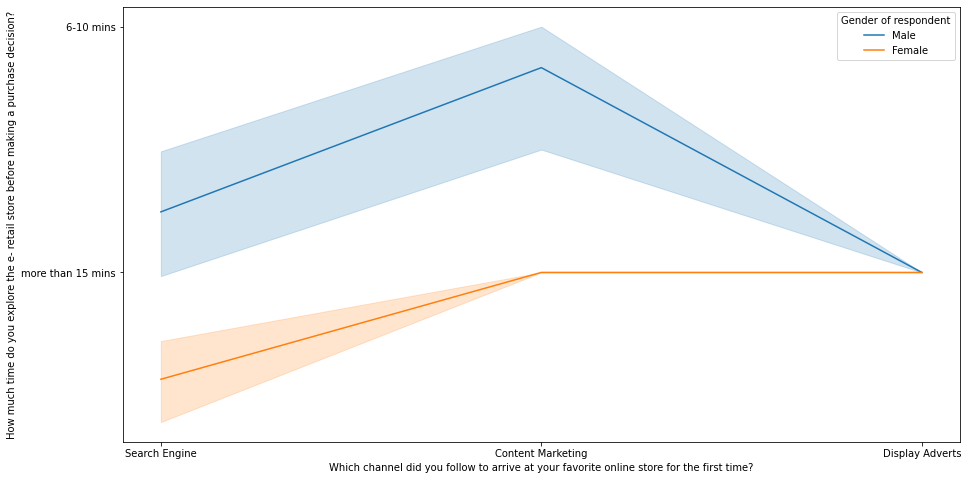

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Which channel did you follow to arrive at your favorite online store for the first time?'],df['How much time do you explore the e- retail store before making a purchase decision?'],hue=df['Gender of respondent'])

Females take more time to explore before making a purchase decision as compared to males, no matter from which channel they arrived at their favourite online store.
*   Females take more than 15 minutes if they arrived by search engine and approximately 15 minutes if they reach using content marketing or display advents.
*   Males take around 10-12 minutes if they arrive by using search engine. They take around 6-10 minutes if they arrive using content marketing. Also, they take 15 minutes if they arrive using display adverts.

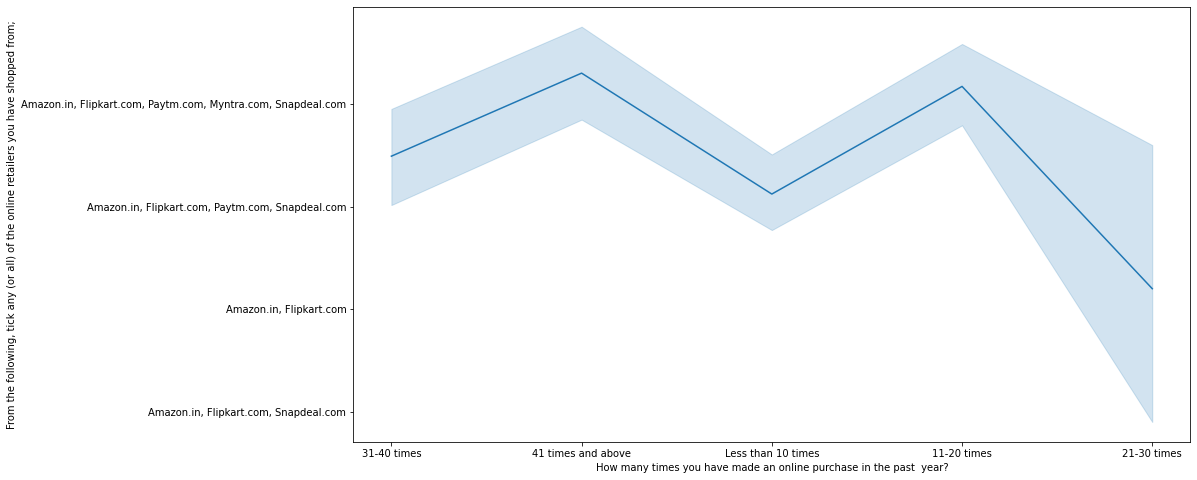

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(df['How many times you have made an online purchase in the past  year?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

*   Common online store that all the respondents have made purchase from is Amazon.com and Flipkart.com
*   Those who made 31-40 purchases or less than 10 purchases have not used Myntra
*    Those who purchased 21-30 times, exclude Myntra.com and snapdeal.com


Text(0.5, 1.0, 'count plot for frequency of abondoning the cart and the payment method')

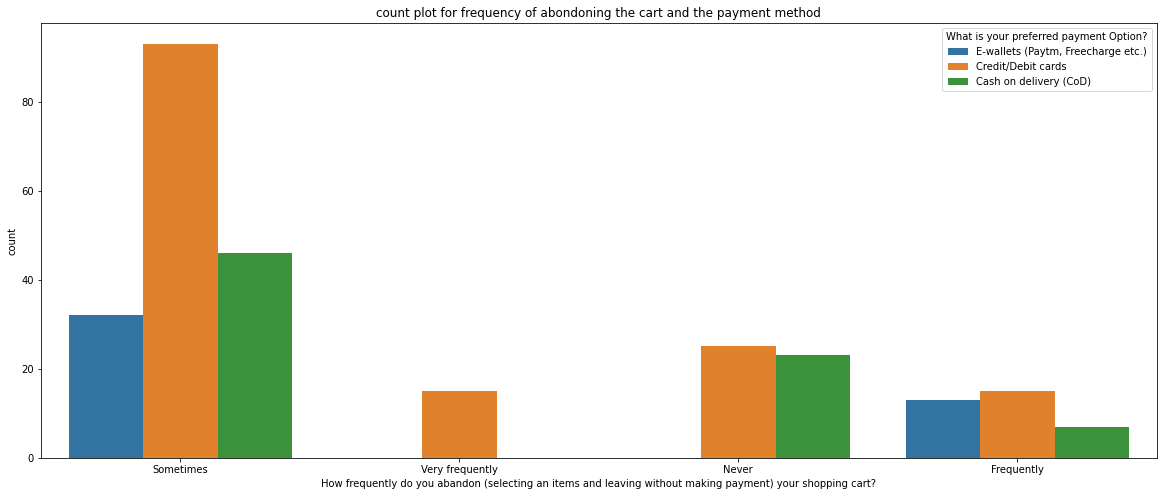

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(df['How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'], hue = df['What is your preferred payment Option?'], ax = ax)
plt.title('count plot for frequency of abandoning the cart and the payment method')


*   Those who abondon their bags **very frequenty** have Credit/Debit cards as their preferred payment option.
*   Those who abondon their carts **frequently** choose all sorts of payment option. The least used option in this category is cash on delivery.
*   Those who **sometimes** abondon their carts mostly prefer Credit/Debit Cards, followed by COD and the least used method of paymetn is E-wallets.
*   Those who **never** abondon their carts, prefer either Credit/Debit Cards or COD.

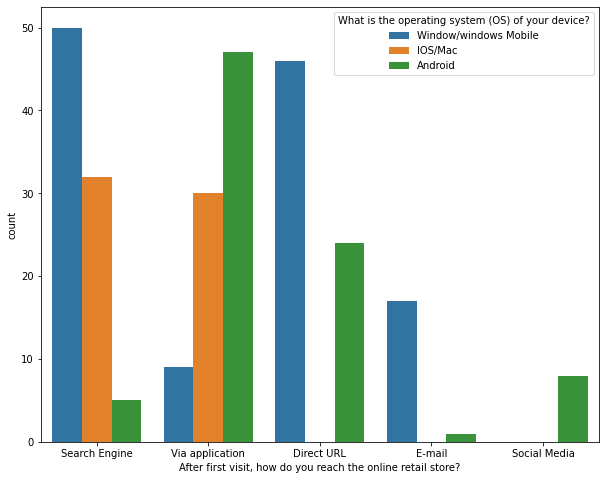

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot( df['After first visit, how do you reach the online retail store?'],
              hue=df['What is the operating system (OS) of your device?']   )

Most people reach by search engine and via application after the visiting the site for the first time. This followed by Direct URL. Very few people use E-mail and social media to reach at the site.
*   Those who use search engine mostly use windows which is followed by iOS and the least number of people use Android
*   Those who use application, mostly Android and it is followed by iOS and the least number of people use Windows
*   Those who Direct URL, don't use iOS. Most of them use Windows and remaining use android
*   Those who used E-mail, mostly use windows 
*   Those who use social media, use only Android

#**The loyality towards brand name**

In [ ]:
performance=['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel']

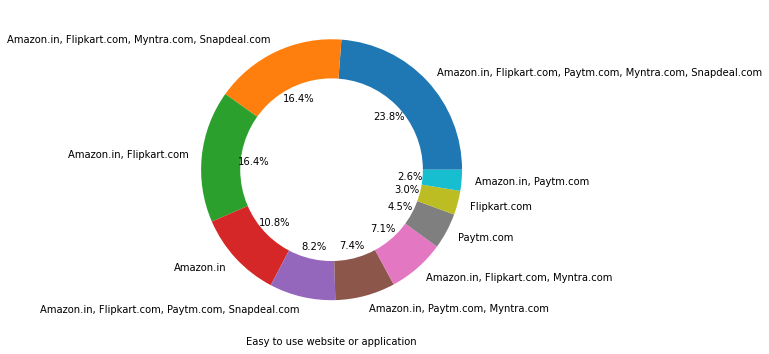

<Figure size 432x288 with 0 Axes>

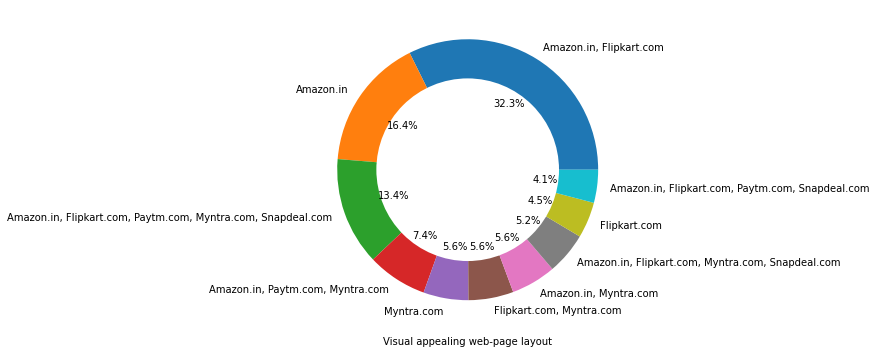

<Figure size 432x288 with 0 Axes>

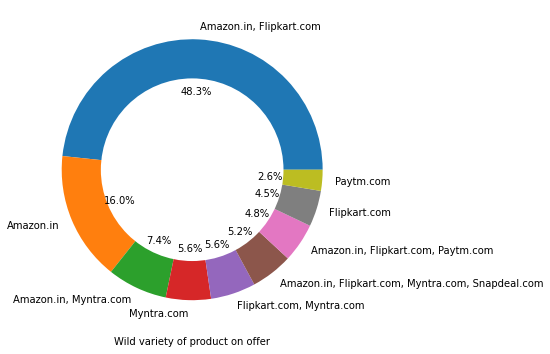

<Figure size 432x288 with 0 Axes>

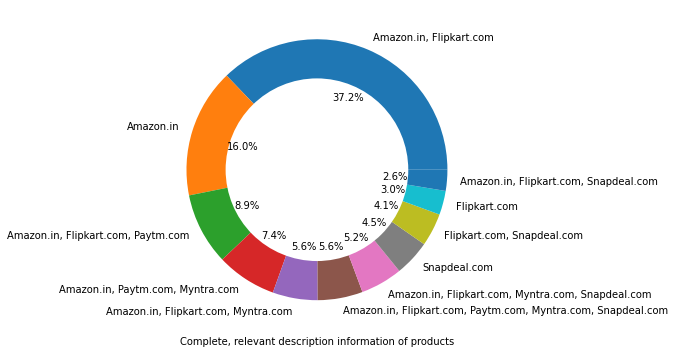

<Figure size 432x288 with 0 Axes>

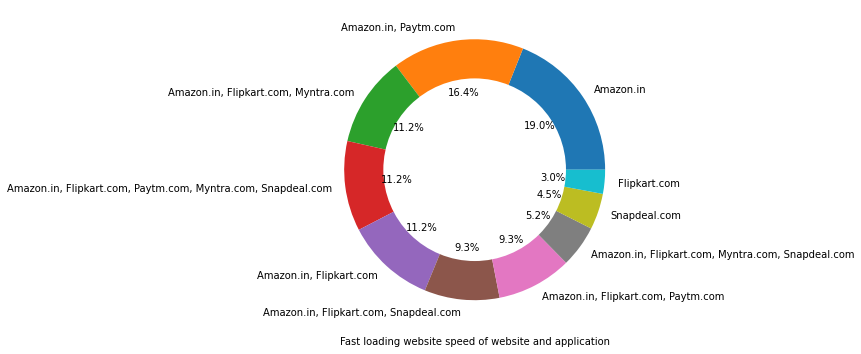

<Figure size 432x288 with 0 Axes>

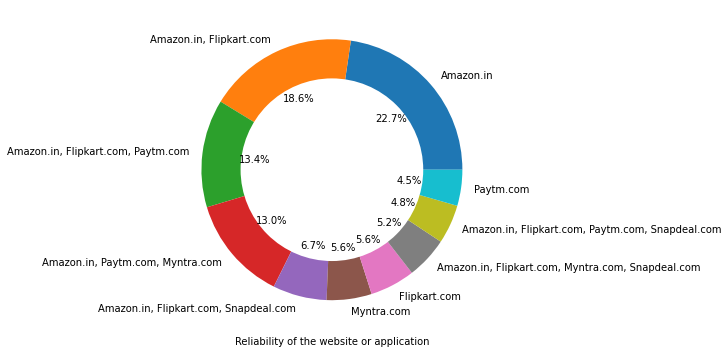

<Figure size 432x288 with 0 Axes>

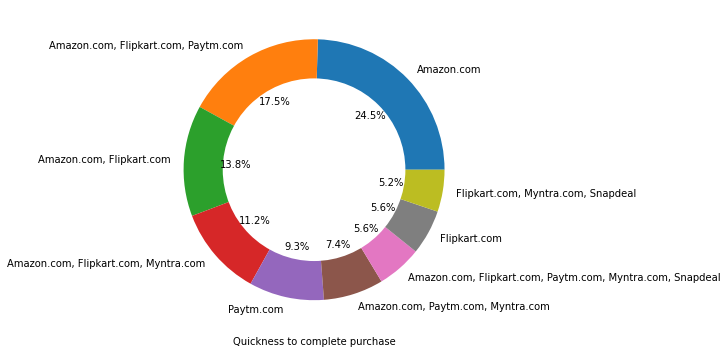

<Figure size 432x288 with 0 Axes>

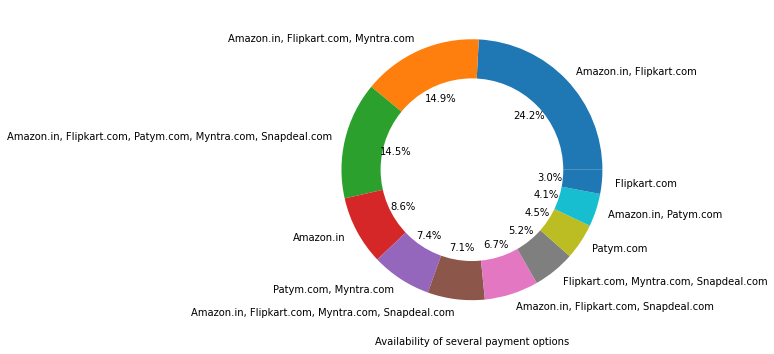

<Figure size 432x288 with 0 Axes>

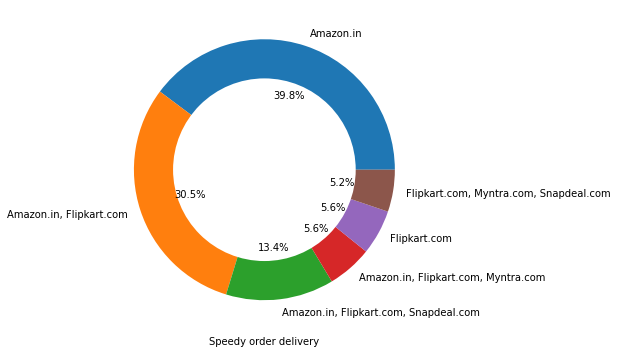

<Figure size 432x288 with 0 Axes>

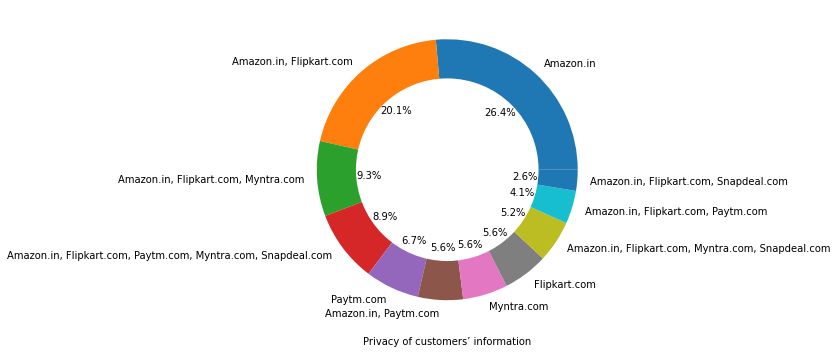

<Figure size 432x288 with 0 Axes>

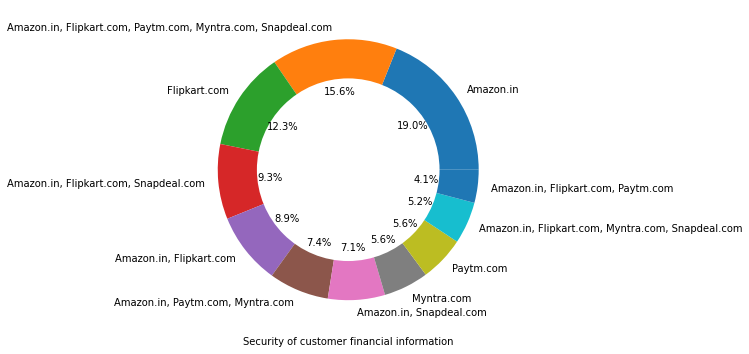

<Figure size 432x288 with 0 Axes>

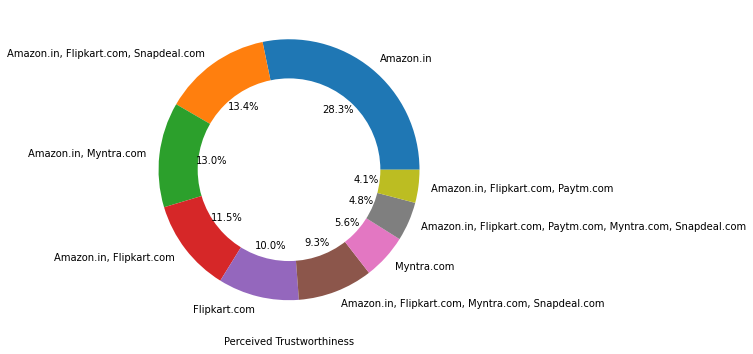

<Figure size 432x288 with 0 Axes>

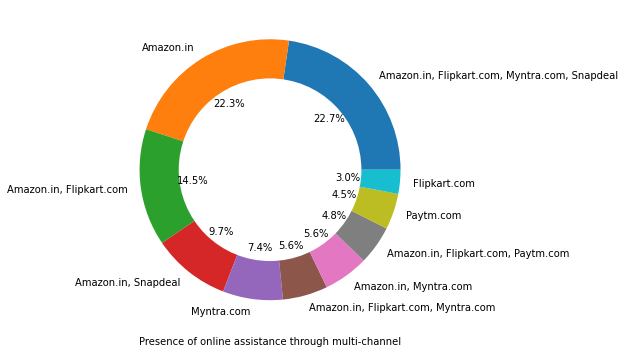

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in performance:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()


Amazon, Flipkart have been had the highest votes for having all the positive points and have maintained a very good brand image followed by paytm and the myntra.





In [ ]:
#Collecting all the negative remarks about a brand
bad=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']

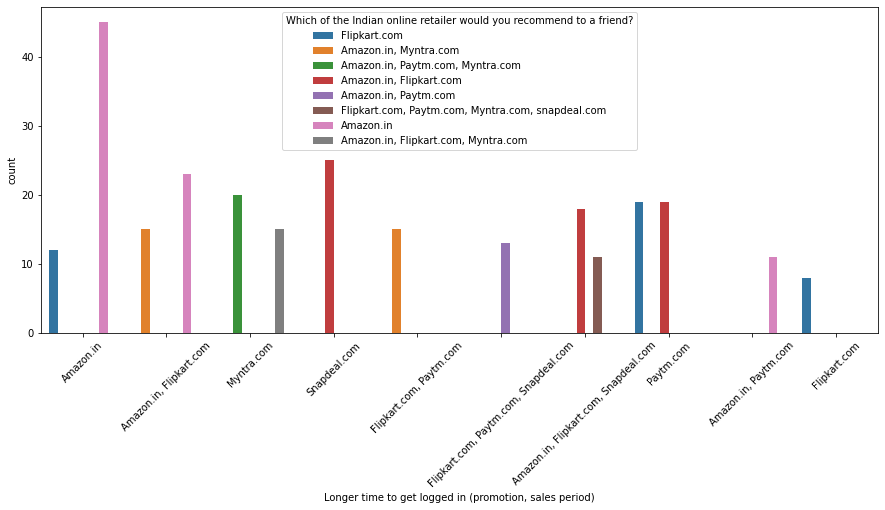

<Figure size 432x288 with 0 Axes>

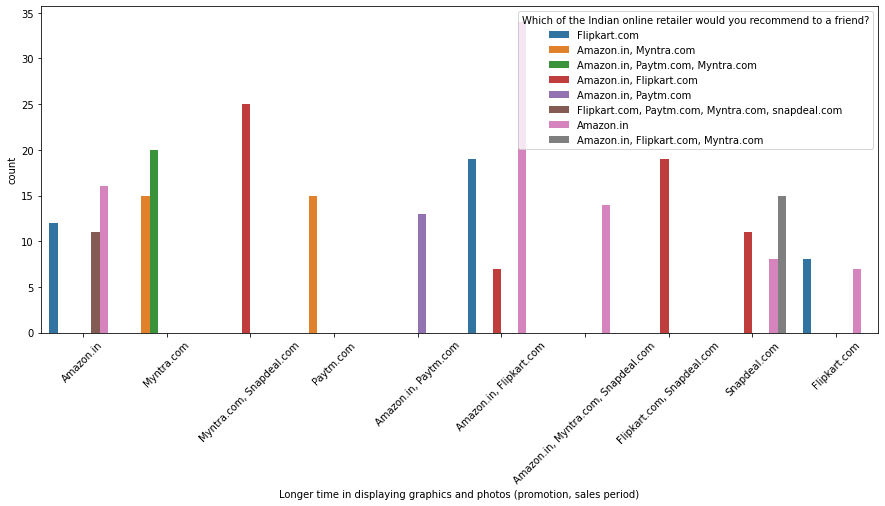

<Figure size 432x288 with 0 Axes>

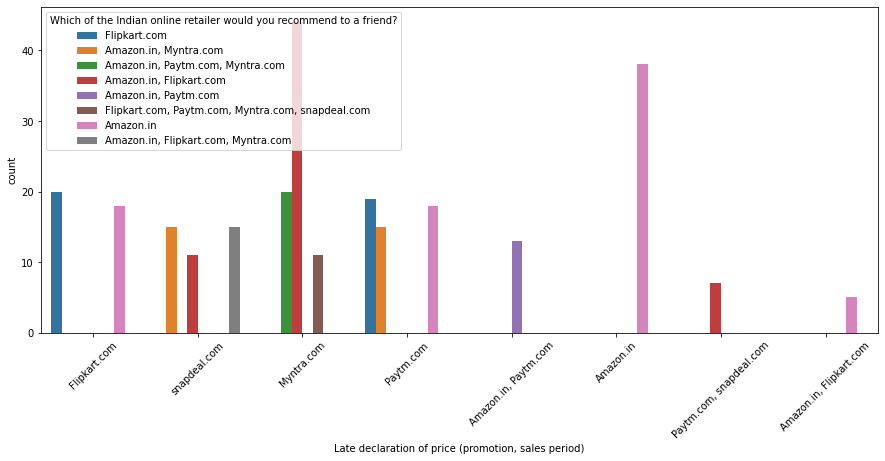

<Figure size 432x288 with 0 Axes>

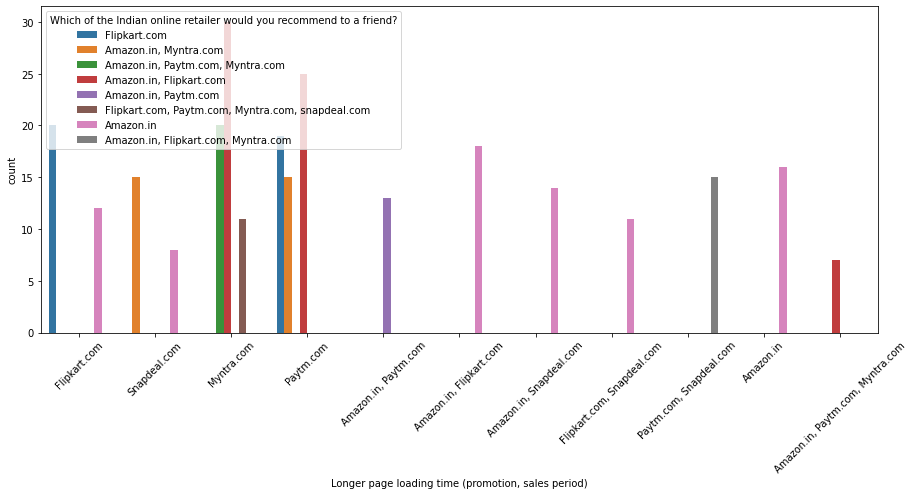

<Figure size 432x288 with 0 Axes>

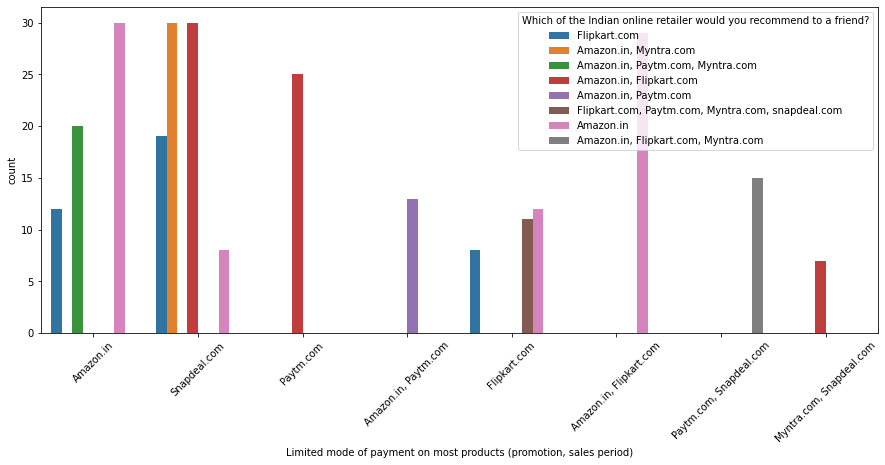

<Figure size 432x288 with 0 Axes>

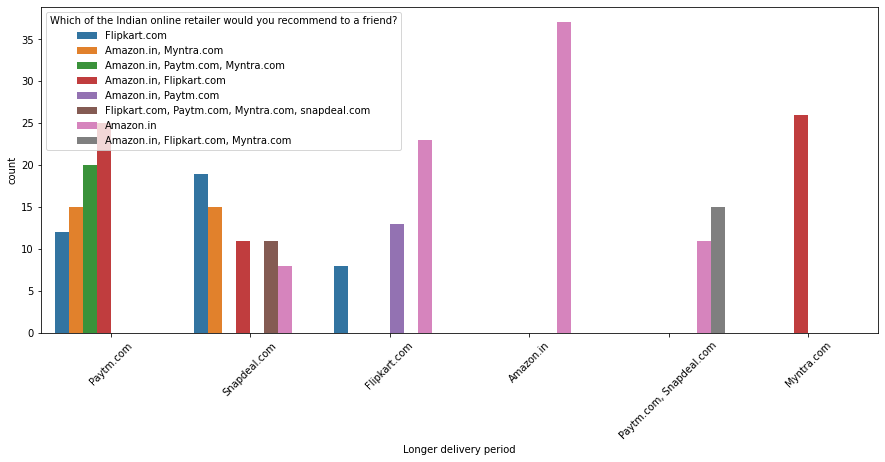

<Figure size 432x288 with 0 Axes>

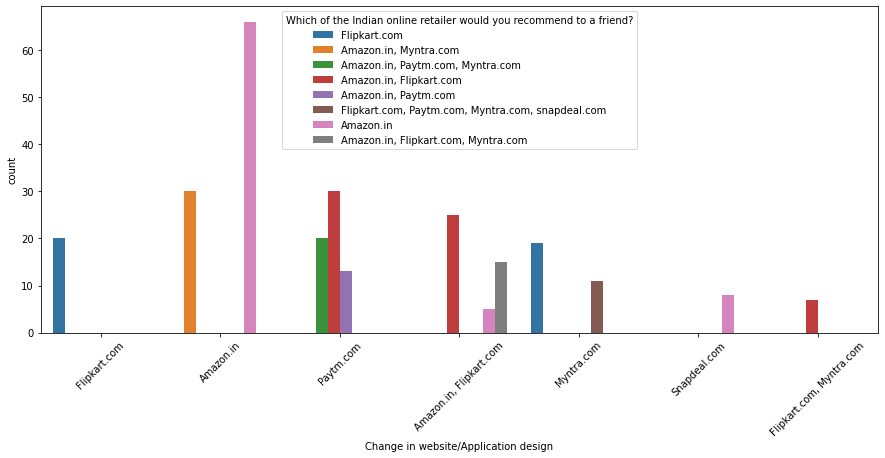

<Figure size 432x288 with 0 Axes>

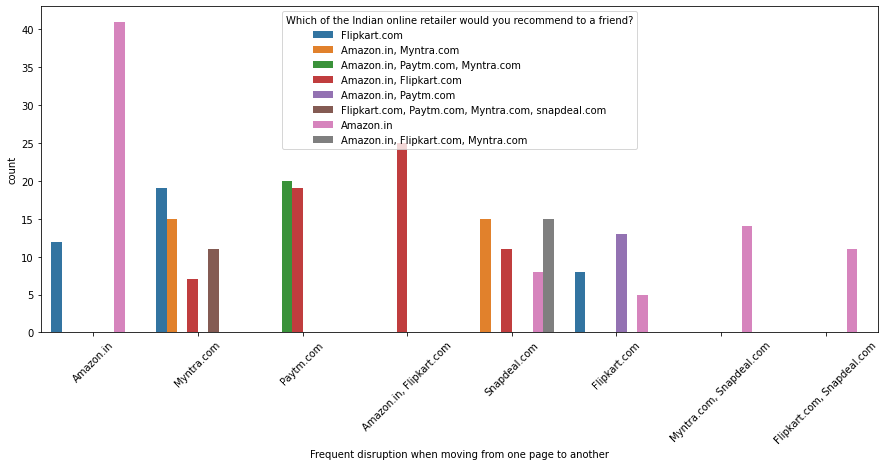

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in bad:
        plt.figure(figsize=(15,6))
        sns.countplot(df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

#**Outliers detection**

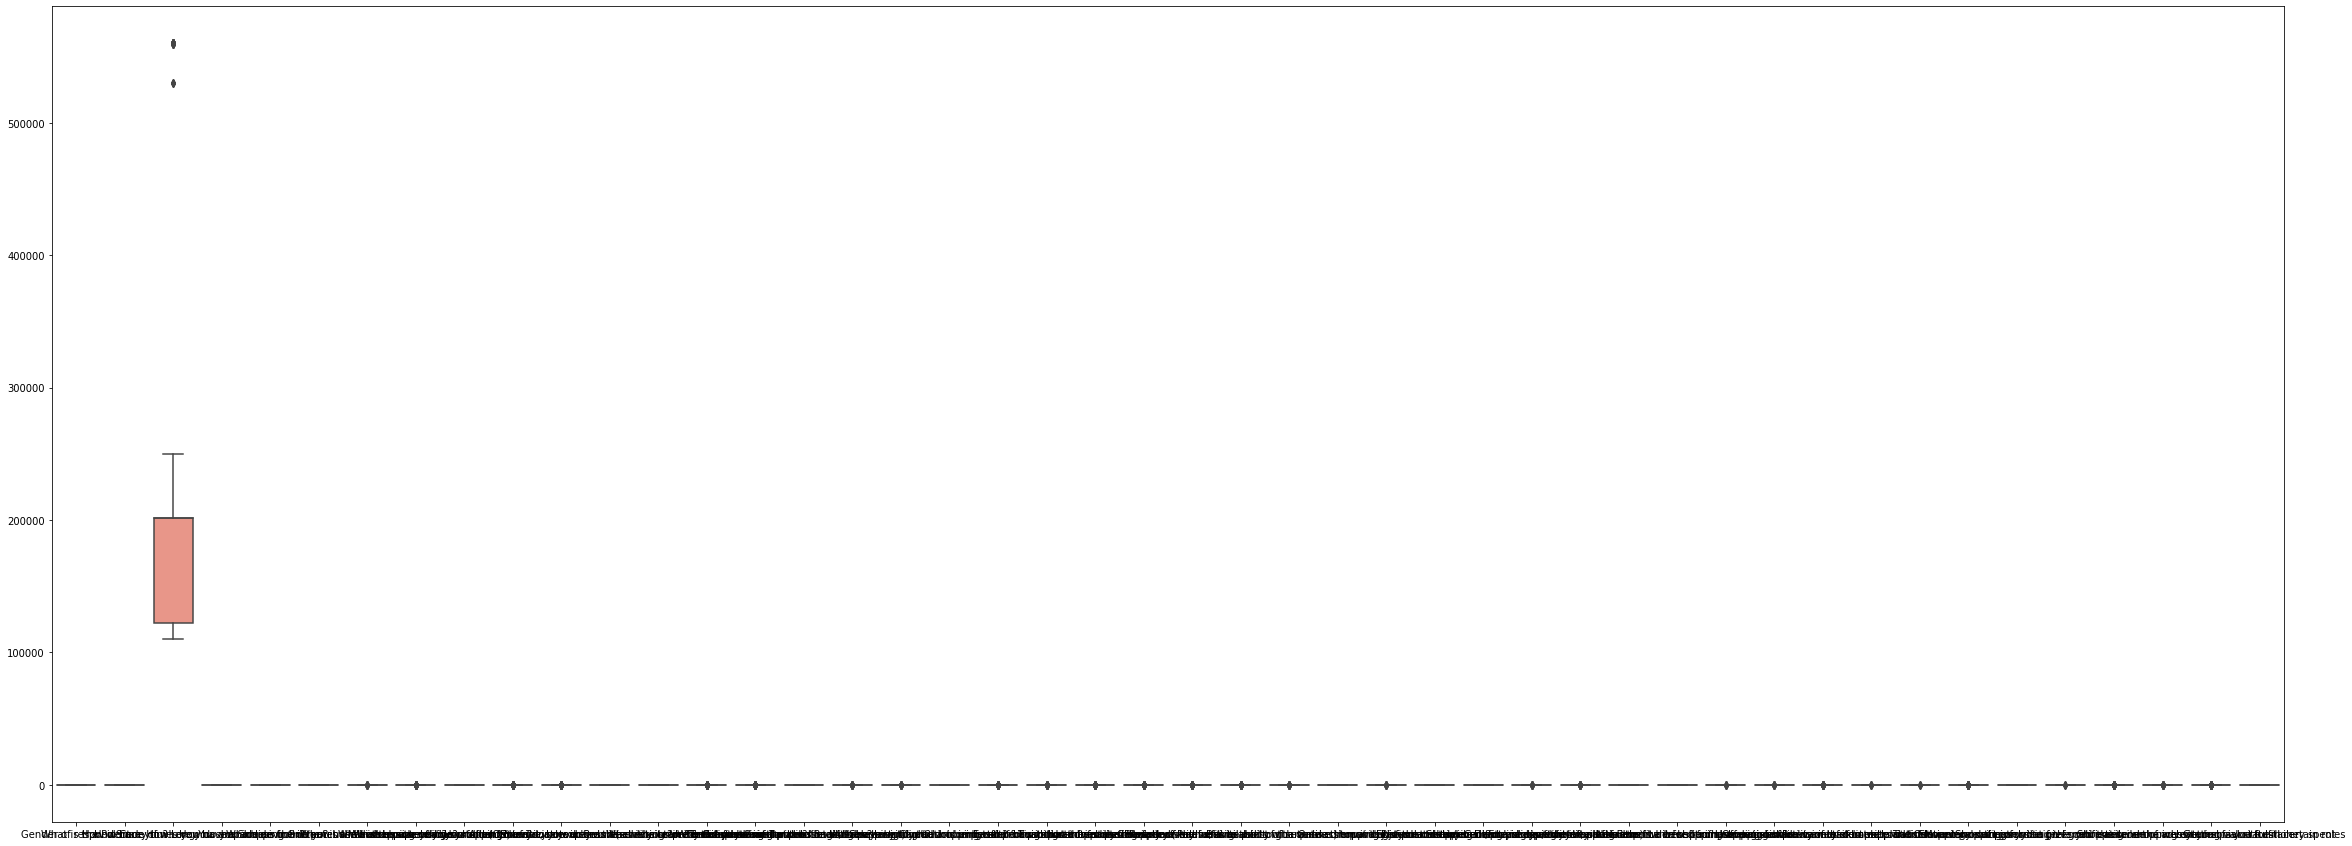

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(40, 15))
sns.boxplot(data = data, ax=ax)
plt.show()

The highest number of outliers are in the feature: What is the Pin Code of where you shop online from? All other features have no outlier or very few outliers

#**Multivatiate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0943694790>,
      dtype=object)

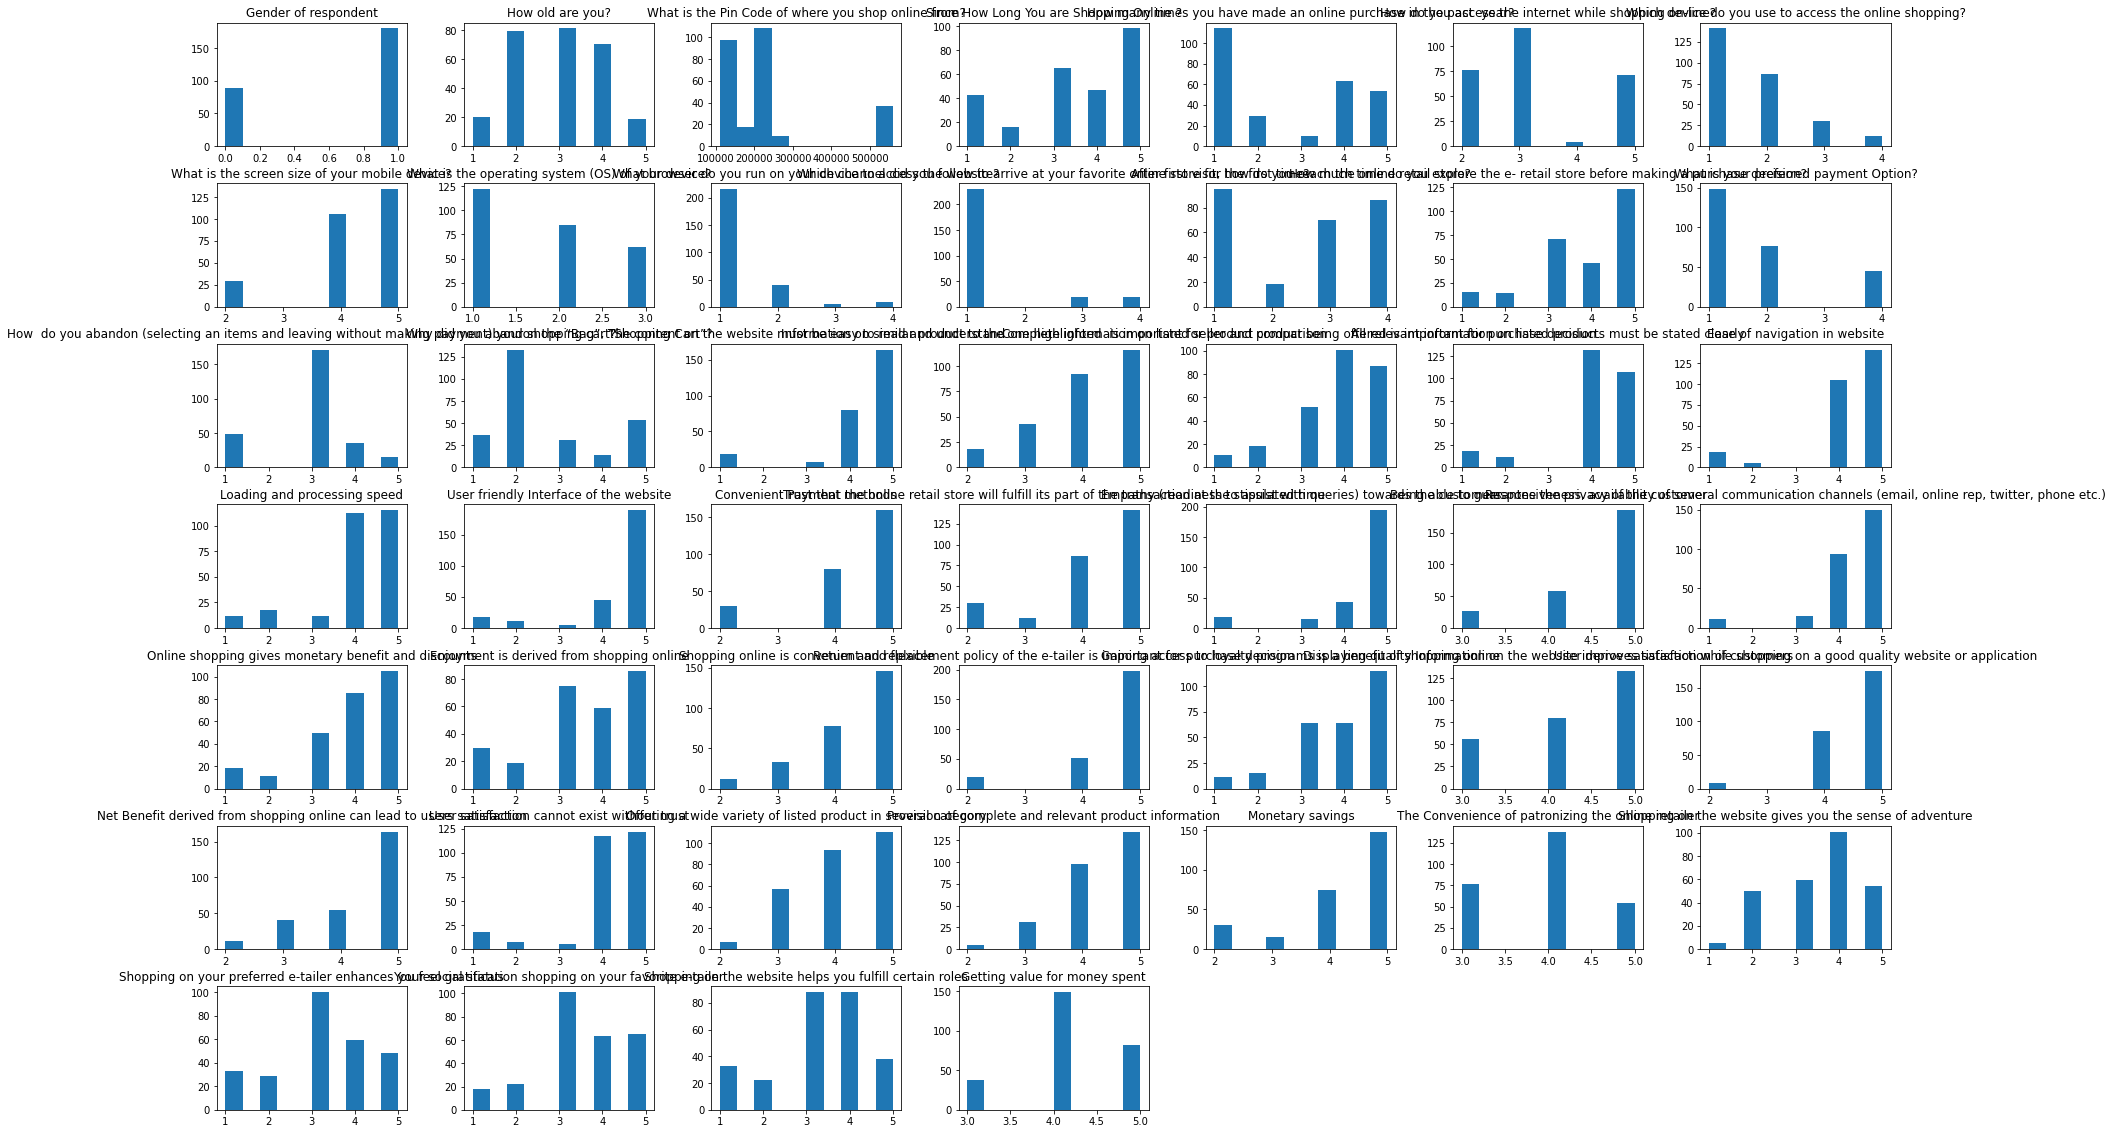

In [ ]:

data.hist(figsize = (30,20), grid = False)

The skewness is high in the following features:
1.   What is the Pin Code of where you shop online from?
2.   Which device do you use to access the online shopping?
3.   What is the screen size of your mobile device?
4.   What browser do you run on your device to access the website?
5.   Which channel did you follow to arrive at your favorite online store for the first time?             
6.   How much time do you explore the e- retail store before making a purchase decision?                       
7.   What is your preferred payment Option?         
8.   The content on the website must be easy to read and understand 
9.   All relevant information on listed products must be stated clearly
10.   Ease of navigation in website   
11.   Loading and processing speed  
12.   Convenient Payment methods 
13.   Trust that the online retail store will fulfill its part of the transaction at the stipulated time  
14.   Empathy (readiness to assist with queries) towards the customers  
15.   Being able to guarantee the privacy of the customer  
16.    Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) 
17.    Online shopping gives monetary benefit and discounts  
Enjoyment is derived from shopping online
18.    Shopping online is convenient and flexible 
19.    Return and replacement policy of the e-tailer is important for purchase decision
20.   Gaining access to loyalty programs is a benefit of shopping online 
Displaying quality Information on the website improves satisfaction of customers
21.   User derive satisfaction while shopping on a good quality website or application 
22.   Net Benefit derived from shopping online can lead to users satisfaction  
23.    User satisfaction cannot exist without trust  
24.   Offering a wide variety of listed product in several category 
25.   Provision of complete and relevant product information 
26.   Monetary savings  

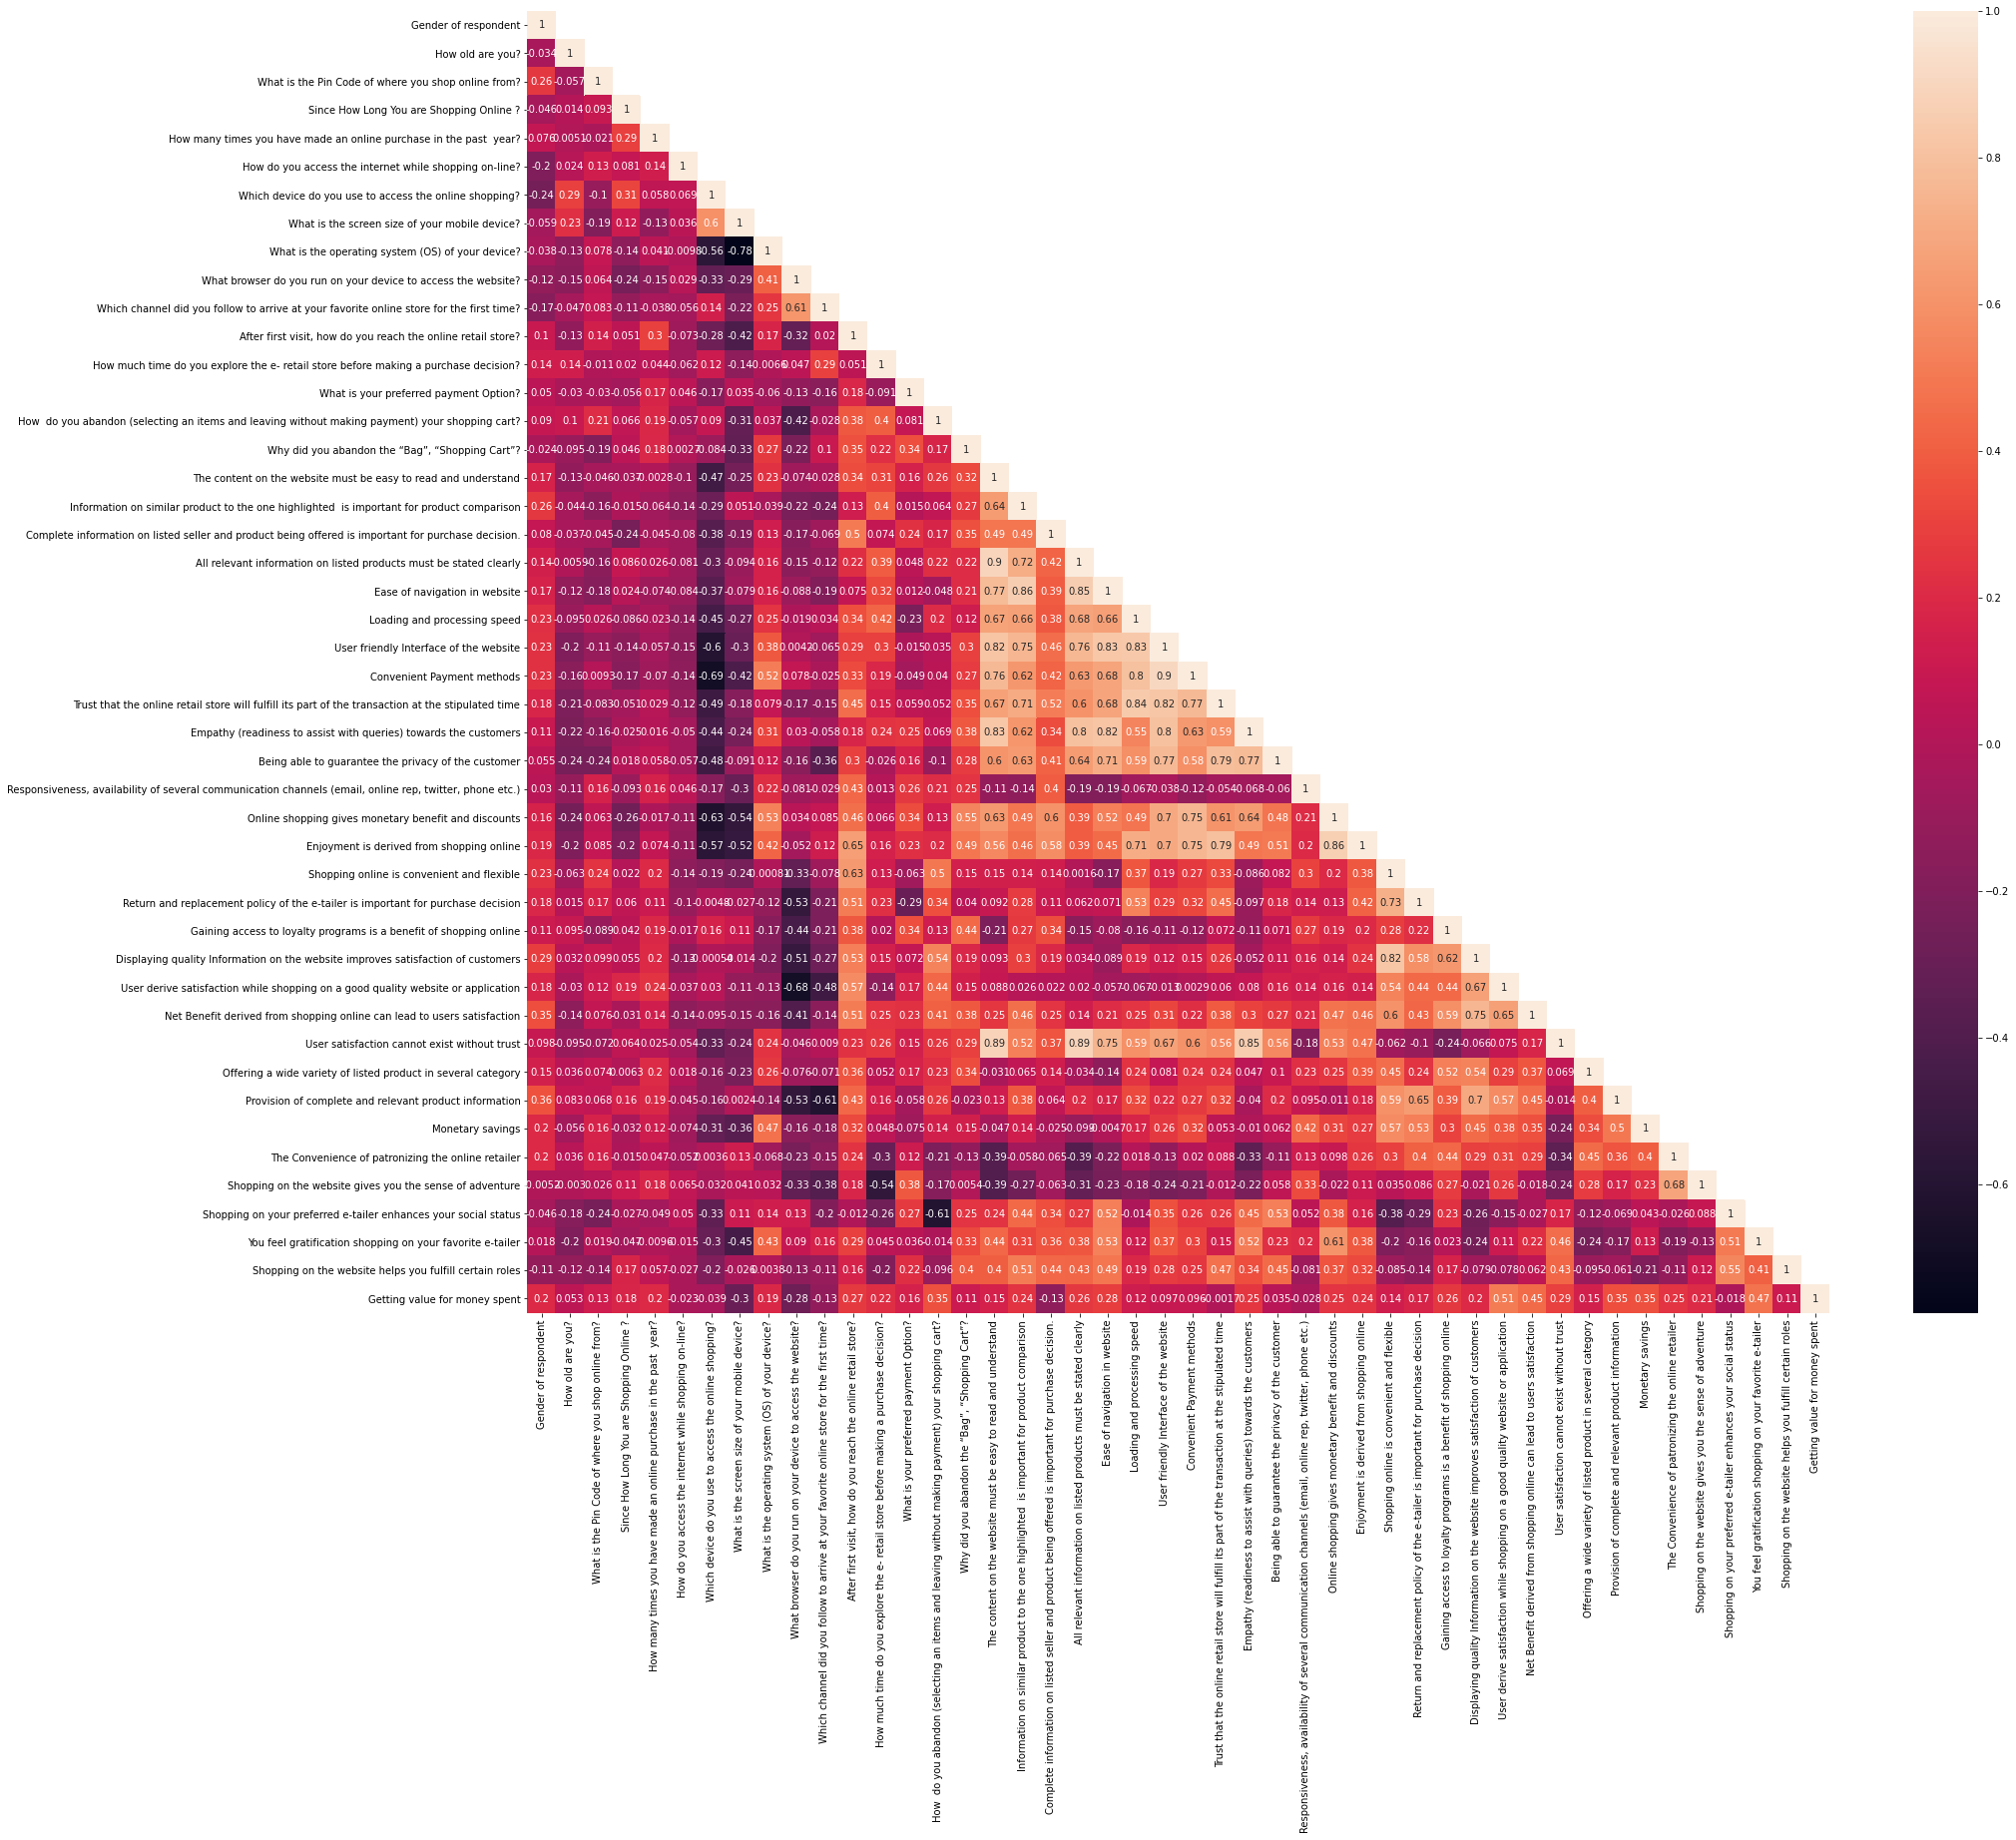

In [ ]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

A correlation value greater than 0.8 and less than -0.8 show highly positively correlated and highly negatively correlated variables respectively.
There are many features those are highly correlated with each other. Thus, there can be a problem of multicollinearity in the data